# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
****

In [3]:
import pandas as pd

## imports for Python, Pandas

In [6]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [4]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [7]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [8]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,info.governor,state,shortname
0,Dade,12345,Rick Scott,Florida,FL
1,Broward,40000,Rick Scott,Florida,FL
2,Palm Beach,60000,Rick Scott,Florida,FL
3,Summit,1234,John Kasich,Ohio,OH
4,Cuyahoga,1337,John Kasich,Ohio,OH


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 

In [9]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{u'_id': {u'$oid': u'52b213b38594d8a2be17c780'},
  u'approvalfy': 1999,
  u'board_approval_month': u'November',
  u'boardapprovaldate': u'2013-11-12T00:00:00Z',
  u'borrower': u'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  u'closingdate': u'2018-07-07T00:00:00Z',
  u'country_namecode': u'Federal Democratic Republic of Ethiopia!$!ET',
  u'countrycode': u'ET',
  u'countryname': u'Federal Democratic Republic of Ethiopia',
  u'countryshortname': u'Ethiopia',
  u'docty': u'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  u'envassesmentcategorycode': u'C',
  u'grantamt': 0,
  u'ibrdcommamt': 0,
  u'id': u'P129828',
  u'idacommamt': 130000000,
  u'impagency': u'MINISTRY OF EDUCATION',
  u'lendinginstr': u'Investment Project Financing',
  u'lendinginstrtype': u'IN',
  u'lendprojectcost': 550000000,
  u'majorsector_percent': [{u'Name': u'Education', u'Percent': 46},
   {u'Name': u'Education', u'Percent': 26},
   {u'Name': u'Public Administration, Law, and Ju

In [10]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{u'$oid': u'52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{u'Percent': 100, u'Name': u'Education for all'}","[{u'code': u'65', u'name': u'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{u'$oid': u'52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Other economic man...","[{u'code': u'24', u'name': u'Other economic ma...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [61]:
import pandas as pd
import json
from pandas.io.json import json_normalize

In [79]:
with open('F:/DS/repo/Springboard/mini project/data_wrangling_json/data/world_bank_projects.json','r') as json_file:
    json_data=json.load(json_file)

In [80]:
df = pd.read_json('F:/DS/repo/Springboard/mini project/data_wrangling_json/data/world_bank_projects.json')

In [64]:
df

,sector,supplementprojectflg,projectfinancialtype,prodline,mjtheme,idacommamt,impagency,project_name,mjthemecode,closingdate,...,majorsector_percent,board_approval_month,theme_namecode,countryname,url,source,projectstatusdisplay,ibrdcommamt,sector_namecode,_id
0,"[{'Name': 'Primary education'}, {'Name': 'Seco...",N,IDA,PE,[Human development],130000000,MINISTRY OF EDUCATION,Ethiopia General Education Quality Improvement...,"8,11",2018-07-07T00:00:00Z,...,"[{'Percent': 46, 'Name': 'Education'}, {'Perce...",November,"[{'code': '65', 'name': 'Education for all'}]",Federal Democratic Republic of Ethiopia,http://www.worldbank.org/projects/P129828/ethi...,IBRD,Active,0,"[{'code': 'EP', 'name': 'Primary education'}, ...",{'$oid': '52b213b38594d8a2be17c780'}
1,[{'Name': 'Public administration- Other social...,N,OTHER,RE,"[Economic management, Social protection and ri...",0,MINISTRY OF FINANCE,TN: DTF Social Protection Reforms Support,"1,6",NaN,...,"[{'Percent': 70, 'Name': 'Public Administratio...",November,"[{'code': '24', 'name': 'Other economic manage...",Republic of Tunisia,http://www.worldbank.org/projects/P144674?lang=en,IBRD,Active,0,"[{'code': 'BS', 'name': 'Public administration...",{'$oid': '52b213b38594d8a2be17c781'}
2,[{'Name': 'Rural and Inter-Urban Roads and Hig...,Y,IDA,PE,"[Trade and integration, Public sector governan...",6060000,MINISTRY OF TRANSPORT AND COMMUNICATIONS,Tuvalu Aviation Investment Project - Additiona...,"5,2,11,6",NaN,...,"[{'Percent': 100, 'Name': 'Transportation'}]",November,"[{'code': '47', 'name': 'Regional integration'...",Tuvalu,http://www.worldbank.org/projects/P145310?lang=en,IBRD,Active,0,"[{'code': 'TI', 'name': 'Rural and Inter-Urban...",{'$oid': '52b213b38594d8a2be17c782'}
3,[{'Name': 'Other social services'}],N,OTHER,RE,"[Social dev/gender/inclusion, Social dev/gende...",0,LABOR INTENSIVE PUBLIC WORKS PROJECT PMU,Gov't and Civil Society Organization Partnership,"7,7",NaN,...,"[{'Percent': 100, 'Name': 'Health and other so...",October,"[{'code': '57', 'name': 'Participation and civ...",Republic of Yemen,http://www.worldbank.org/projects/P144665?lang=en,IBRD,Active,0,"[{'code': 'JB', 'name': 'Other social services'}]",{'$oid': '52b213b38594d8a2be17c783'}
4,[{'Name': 'General industry and trade sector'}...,N,IDA,PE,"[Trade and integration, Financial and private ...",13100000,MINISTRY OF TRADE AND INDUSTRY,Second Private Sector Competitiveness and Econ...,"5,4",2019-04-30T00:00:00Z,...,"[{'Percent': 50, 'Name': 'Industry and trade'}...",October,"[{'code': '45', 'name': 'Export development an...",Kingdom of Lesotho,http://www.worldbank.org/projects/P144933/seco...,IBRD,Active,0,"[{'code': 'YZ', 'name': 'General industry and ...",{'$oid': '52b213b38594d8a2be17c784'}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,"[{'Name': 'General agriculture, fishing and fo...",N,OTHER,RE,"[Financial and private sector development, Soc...",0,THE COMPETITIVENESS COMPANY,Technological Scale Up for Youth-led Urban Orn...,"4,7",2013-08-31T00:00:00Z,...,"[{'Percent': 50, 'Name': 'Agriculture, fishing...",August,"[{'code': '40', 'name': 'Regulation and compet...",Jamaica,http://www.worldbank.org/projects/P127299/tech...,IBRD,Closed,0,"[{'code': 'AZ', 'name': 'General agriculture, ...",{'$oid': '52b213b38594d8a2be17c96f'}
496,[{'Name': 'Central government administration'}...,N,IDA,PE,"[Human development, Trade and integration, Pub...",20000000,MINISTRY OF FINANCE,Lao Eight Poverty Reduction Support,"8,5,2,8",2012-12-31T00:00:00Z,...,"[{'Percent': 36, 'Name': 'Public Administratio...",August,"[{'code': '63', 'name': 'Child health'}, {'cod...",Lao People's Democratic Republic,http://www.worldbank.org/projects/P125298/lao-...,IBRD,Closed,0,"[{'code': 'BC', 'name': 'Central government ad...",{'$oid': '52b213b38594d8a2be17c970'}
497,"[{'Name': 'Irrigation and drainage'}, {'Name':...",N,OTHER,RE,[Rural development],0,MINISTRY OF AGRICULTURE AND PRODUCER ORGANISAT...,Second Emerge

In [65]:
#groupby the data by the count of countries
df_grouped=df.groupby('countryname').count()

In [66]:
df_grouped

,sector,supplementprojectflg,projectfinancialtype,prodline,mjtheme,idacommamt,impagency,project_name,mjthemecode,closingdate,...,sector3,majorsector_percent,board_approval_month,theme_namecode,url,source,projectstatusdisplay,ibrdcommamt,sector_namecode,_id
countryname,,,,,,,,,,,,,,,,,,,,,
Africa,11,11,11,11,11,11,8,11,11,7,...,7,11,11,11,11,11,11,11,11,11
Antigua and Barbuda,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Arab Republic of Egypt,2,2,2,2,2,2,2,2,2,2,...,0,2,2,2,2,2,2,2,2,2
Argentine Republic,2,2,2,2,2,2,2,2,2,0,...,1,2,2,2,2,2,2,2,2,2
Bosnia and Herzegovina,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Union of the Comoros,3,3,3,3,3,3,3,3,3,2,...,2,3,3,3,3,3,3,3,3,3
United Mexican States,2,2,2,2,2,2,2,2,2,1,...,2,2,2,2,2,2,2,2,2,2
United Republic of Tanzania,8,8,8,8,8,8,8,8,8,4,...,3,8,8,8,8,8,8,8,8,8


In [67]:
#ascending by the number
df_sort=df_grouped.sort_values(by='sector', ascending=False)

In [68]:
df_sort.head(10)

,sector,supplementprojectflg,projectfinancialtype,prodline,mjtheme,idacommamt,impagency,project_name,mjthemecode,closingdate,...,sector3,majorsector_percent,board_approval_month,theme_namecode,url,source,projectstatusdisplay,ibrdcommamt,sector_namecode,_id
countryname,,,,,,,,,,,,,,,,,,,,,
People's Republic of China,19,19,19,19,17,19,19,19,19,16,...,11,19,19,17,19,19,19,19,19,19
Republic of Indonesia,19,19,19,19,19,19,19,19,19,15,...,10,19,19,19,19,19,19,19,19,19
Socialist Republic of Vietnam,17,16,17,17,17,17,17,17,17,14,...,10,17,17,17,17,17,17,17,17,17
Republic of India,16,16,16,16,16,16,15,16,16,13,...,9,16,16,16,16,16,16,16,16,16
Republic of Yemen,13,13,13,13,13,13,13,13,13,8,...,4,13,13,13,13,13,13,13,13,13
People's Republic of Bangladesh,12,12,12,12,12,12,12,12,12,10,...,6,12,12,12,12,12,12,12,12,12
Nepal,12,12,12,12,11,12,11,12,12,7,...,6,12,12,11,12,12,12,12,12,12
Kingdom of Morocco,12,12,12,12,11,12,11,12,12,11,...,5,12,12,11,12,12,12,12,12,12
Republic of Mozambique,11,11,11,11,11,11,11,11,11,9,...,6,11,11,11,11,11,11,11,11,11


In [69]:
#another way for counts of countries
df_grouped2=df['countryname'].value_counts()

In [70]:
df_grouped2.head(10)

People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Republic of Mozambique             11
Africa                             11
Name: countryname, dtype: int64

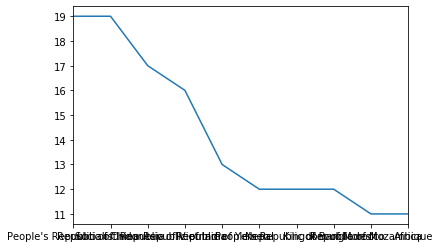

In [71]:
df_grouped2.head(10).plot()

In [189]:
#normalize by the 'mjthemecode'
df_major=json_normalize(json_data, 'mjtheme_namecode')
df_major

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
...,...,...
1494,10,Rural development
1495,9,Urban development
1496,8,Human development
1497,5,Trade and integration


In [215]:
#way to sort major by groupby
df_major1=df_major.groupby('name')

In [216]:
df_major1=df_major1.size().sort_values(ascending = False)

In [217]:
df_major1.head(10)

name
Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
dtype: int64

In [218]:
#another way to sort major by value_counts
df_major2=df_major['name'].value_counts()

In [219]:
df_major2.head(10)

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: name, dtype: int64

In [232]:
df_major['name']=df_major['name'].astype(object)

In [233]:
#fill missing data of 'name'
df_major['name'].fillna('unkown',inplace=True)

In [234]:
df_major2.head(10)

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: name, dtype: int64